In this project we will work on a data and build a multiple linear regression model. We will also look at the assumption of OLS and at the end will see how many assumption our model has fulfilled.
In the first step, we imported the data and all the necessary libraries. Then in the second step, we will inspect the data and collect all the necessary information. We looked at the columns and in the state column we had variables in object type, we changed them to numerical values. As the data is now in correct form, we moved towards the building of the model. In the next step, we assigned x and y values to our independent and dependent variables. The model wsa built then and it was fitted. The results showed that it worked proprly. Next we derived coefficient and intercept values. Furthermore, we interpreted the results of the model. To check the assumption, we conducted various tests.

### Multiple Linear Regression Model and assumptions testing

### Step1: We will import all necessary libraries

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline


### Step2: Importing Data in Csv form

In [3]:
df= pd.read_csv(r"C:\Users\HP\Desktop\1000_Companies.csv")

In [4]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


### Step:3 Cleaning and getting information from the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


in the data the State variable is categorical and we will change it to categories and assign it numerical values and then cahnge its type to integer

In [6]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

we have three categories and we will assign three values to these categories for example:
'New York'= 1
'California'= 2
'Florida'= 3
for this we will use replace method. 



In [7]:
df['State']= df['State'].replace({'New York': 1, 'California':2, 'Florida':3})

C:\Users\HP\AppData\Local\Temp\ipykernel_11552\1393765647.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['State']= df['State'].replace({'New York': 1, 'California':2, 'Florida':3})


In [8]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39


we can see that the state has change to three categories

now we will convert the column to integer type

In [9]:
df['State']= df['State'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   int64  
 4   Profit           1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


the data type has changed to integer successfully

Step:4 Making linear regression model

In [11]:
x= df[['R&D Spend',	'Administration', 'Marketing Spend','State']]
y= df['Profit']

In [15]:
reg= linear_model.LinearRegression()
reg.fit(x,y)


LinearRegression()

In [17]:
reg.coef_

array([ 5.53204150e-01,  1.02649898e+00,  8.10242612e-02, -2.70789702e+02])

These are the coefficients of the model,we have four independent variables and we have four coefs. 

In [18]:
reg.intercept_

np.float64(-69645.50797651078)

this is the intercept when all the x values are zero 

In [ ]:
Step:5 checking fitness of the model.

In [ ]:
First method we use is r2 method

In [19]:
reg.score(x,y)

0.9498897533997924

The R² value is called the Coefficient of Determination. it measure how much variation in dependent variable is due to indpendent variable
in the model. 95% is a good score.

In [20]:
import statsmodels.api as sm

X = sm.add_constant(x)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     4715.
Date:                Tue, 21 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:31:59   Log-Likelihood:                -10588.
No. Observations:                1000   AIC:                         2.119e+04
Df Residuals:                     995   BIC:                         2.121e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6.965e+04   4030.666    -

this is the test for checking fitness of the model and also significance of the variables,
there are various important things which we need to interpret:
1. Adj. R-squared:  0.950 shows that the model is significant as we explained in the r2.
2. Prob (F-statistic):   0.00 shows that the model is significant because value is less than 0.05.
3.  P>|t| values shows that the variable has significant influnece on the dependent variable. in our model
   only state has no significant influence others have.
4. Durbin-Watson:    1.688 shows that there is autocorrelation but it is in acceptable range. usually form 1.5 to 2.5 is
   considered as acceptable range.
5.  Prob(JB):   0.00 shows that the residuals are not normally distributed.    

Now we will look at the assumptions of multiple linear regression model.  

In [ ]:
#Ist Assumption: The relationship between dependent and independent variables is linear.
#to check this first we will calculate residuals

to check linearity we need to have two extra columns: residuals and predicted varibales:

In [21]:
df['predicted_values']= reg.predict(x)

In [22]:
df['predicted_values']

0      200306.976045
1      211118.127071
2      151305.001560
3      162816.117649
4      131638.577451
           ...      
995     95387.524395
996    164997.673478
997    252026.908191
998    353874.937618
999    321307.571977
Name: predicted_values, Length: 1000, dtype: float64

In [23]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit,predicted_values
0,165349.2,136897.80,471784.10,1,192261.83,200306.976045
1,162597.7,151377.59,443898.53,2,191792.06,211118.127071


now, we will add another column residuals to the data frame

In [25]:
df['residuals']= df['Profit']-df['predicted_values']

In [26]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit,predicted_values,residuals
0,165349.2,136897.80,471784.10,1,192261.83,200306.976045,-8045.146045
1,162597.7,151377.59,443898.53,2,191792.06,211118.127071,-19326.067071


we have both the columns and now we can check the model for linearity

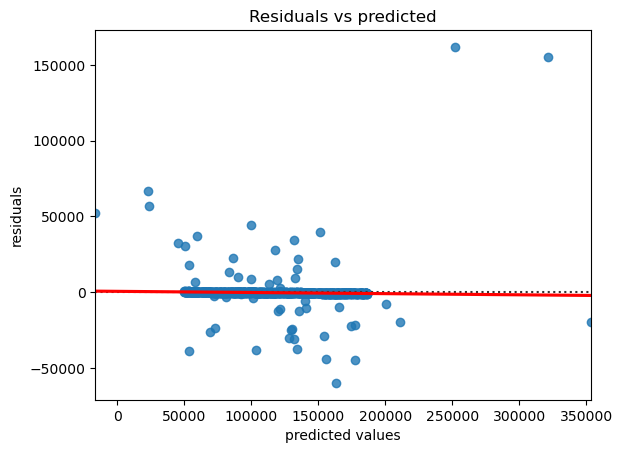

In [28]:
sns.residplot(x=df ['predicted_values'], y= df['residuals'], lowess=True, line_kws={'color':'red'})
plt.xlabel("predicted values")
plt.ylabel("residuals")
plt.title("Residuals vs predicted")
plt.show()

the red line is near zero, so we can say that linearity holds.

In [ ]:
2nd Assumption: Residuals (errors) should be independent — no autocorrelation.

For this assumption Durbin watson test is used which we have already interpreted earlier. the value
is    1.688 shows that there is autocorrelation but it is in acceptable range. usually form 1.5 to 2.5 is
   considered as acceptable range.

3rd Assumption: Homoscadelasticity Variance of residuals should be constant across all levels of fitted values.

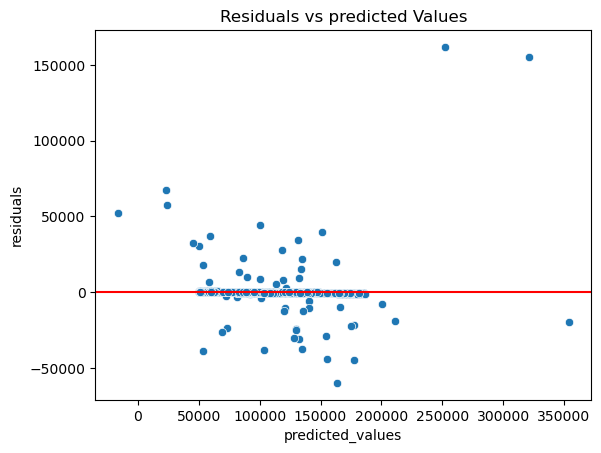

In [30]:
sns.scatterplot(x=df['predicted_values'], y=df['residuals'])
plt.axhline(0, color='red')
plt.title("Residuals vs predicted Values")
plt.show()

In [31]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier': np.float64(261.3331895822477), 'p-value': np.float64(2.3533933230456634e-55), 'f-value': np.float64(88.00534962687667), 'f p-value': np.float64(4.6825963454483275e-64)}


Both the tests were conducted for checking heteroscadelasticity and the test and graph shwos that there is heteroscadelastict and 
variance of error term is not constant across predicted values. 

4th assumption: Residuals should be normally distributed with mean ≈ 0.

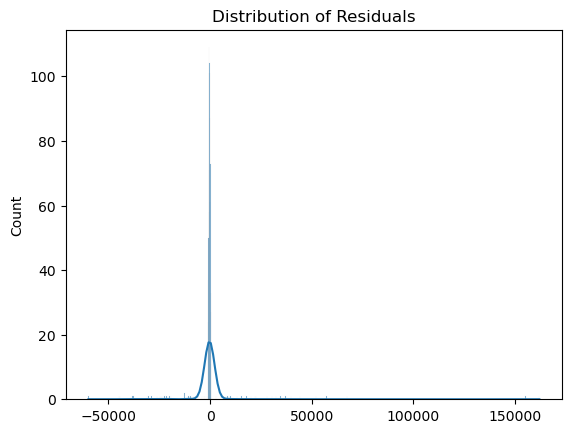

In [32]:
sns.histplot(model.resid, kde=True)
plt.title("Distribution of Residuals")
plt.show()

Prob(JB):   0.00 shows that the residuals are not normally distributed.  

to check normality we use histogram ad JB test and results of both shows that data is not normally distributed.

5th Assumption: Independent variables are not highly correlated with each other.
Multicollinearity

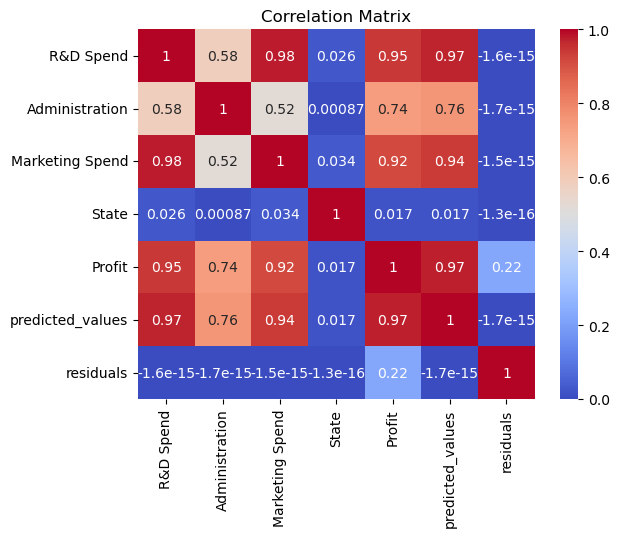

In [33]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = model.model.exog
vif = pd.DataFrame()
vif["Variable"] = model.model.exog_names
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)


          Variable         VIF
0            const  175.549799
1        R&D Spend   28.296375
2   Administration    1.656609
3  Marketing Spend   25.658292
4            State    1.002427


both vif and heatmap shows that there is strong MC in Marketing spend and R and D

6th Assumption: no outliers, No single observation should unduly influence the model.

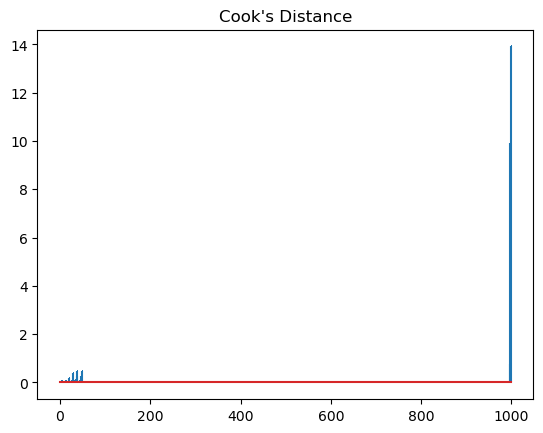

In [35]:
influence = model.get_influence()
(c, p) = influence.cooks_distance

plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's Distance")
plt.show()

the cook diagram shows that we have potential outliers in the data which influence the results. 

The x-axis represents the observation index (each data point).

The y-axis represents the Cook’s Distance value for each observation.

Now we will fix the errors in the model and data.we will start with handling outliers. as we have already found outliers
now we will deal with it. 

In [37]:

import statsmodels.api as sm

model = sm.OLS(y, X).fit()
influence = model.get_influence()
cooks_d, _ = influence.cooks_distance
influential_points = np.where(cooks_d > 1)[0]
print(influential_points)

[997 999]


In [40]:
df.tail(5)

,R&D Spend,Administration,Marketing Spend,State,Profit,predicted_values,residuals
995,54135.00,118451.999,173232.6695,2,95279.96251,95387.524395,-107.561885
996,134970.00,130390.080,329204.0228,2,164336.60550,164997.673478,-661.067978
997,100275.47,241926.310,227142.8200,2,413956.48000,252026.908191,161929.571809
998,128456.23,321652.140,281692.3200,2,333962.19000,353874.937618,-19912.747618
999,161181.72,270939.860,295442.1700,1,476485.43000,321307.571977,155177.858023


In [41]:
df.drop([996, 997, 999], inplace=True)

In [48]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit,predicted_values,residuals
0,165349.2,136897.80,471784.10,1,192261.83,200306.976045,-8045.146045
1,162597.7,151377.59,443898.53,2,191792.06,211118.127071,-19326.067071


In [45]:
df.drop([998], inplace=True)

In [64]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit,predicted_values,residuals,y_log
0,165349.20,136897.8000,471784.1000,1,192261.83000,200306.976045,-8045.146045,12.166613
1,162597.70,151377.5900,443898.5300,2,191792.06000,211118.127071,-19326.067071,12.164167
2,153441.51,101145.5500,407934.5400,3,191050.39000,151305.001560,39745.388440,12.160292
3,144372.41,118671.8500,383199.6200,1,182901.99000,162816.117649,20085.872351,12.116706
4,142107.34,91391.7700,366168.4200,3,166187.94000,131638.577451,34549.362549,12.020875
...,...,...,...,...,...,...,...,...
991,131106.00,129819.4269,321748.4242,1,161035.62360,161941.023152,-905.399552,11.989381
992,105127.00,125982.7298,271621.8728,3,138841.98810,139027.920689,-185.932589,11.841092
993,46798.00,117368.4374,159075.9080,2,89012.02672,89069.349530,-57.322810,11.396527
994,97209.00,124813.3635,256344.0701,1,132077.70900,132751.003644,-673.294644,11.791146


we have removed the four outliers from the data.

Secondly, we will address MC

In [49]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0).fit(X, y)
lasso = Lasso(alpha=0.1).fit(X, y)

Thirdly, we will deal with Hetrroscadelasticity now. 

In [54]:
df['y_log'] = np.log(y)

In [55]:
df['y_log']

0      12.166613
1      12.164167
2      12.160292
3      12.116706
4      12.020875
         ...    
991    11.989381
992    11.841092
993    11.396527
994    11.791146
995    11.464575
Name: y_log, Length: 996, dtype: float64

In [56]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit,predicted_values,residuals,y_log
0,165349.2,136897.80,471784.10,1,192261.83,200306.976045,-8045.146045,12.166613
1,162597.7,151377.59,443898.53,2,191792.06,211118.127071,-19326.067071,12.164167


In [67]:
X = df.drop(["Profit", "y_log"], axis=1)  # remove both actual & log profit
y = df['y_log']                           # use log of profit

# 2️⃣ Handle categorical columns (e.g., "State")
X = pd.get_dummies(X, drop_first=True)

# 3️⃣ Add constant term for intercept
X_const = sm.add_constant(X)

# 4️⃣ Fit OLS regression model
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_log   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     5870.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:07:18   Log-Likelihood:                 1277.4
No. Observations:                 996   AIC:                            -2543.
Df Residuals:                     990   BIC:                            -2513.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0001   1.04e-05  

In [68]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge Coefficients:", ridge.coef_)
print("R²:", ridge.score(X_test, y_test))

Ridge Coefficients: [-1.61263418e-06  1.41654892e-05  8.05406191e-07  2.51707664e-08
  6.89703339e-06  1.98010115e-05]
R²: 0.9740003790949535
